# STUDYING CUSTOMER BEHAVIOUR & SHOPPING HABITS ANALYSIS FOR TARGETED MARKETING STRATEGIES

1. PROBLEM STATEMENT

Investigate the impact of various factors, such as seasonality, item attributes (size and color), 
and promotional activities (discounts and promo codes), on customer purchase decisions. 
1. Are there specific times of the year when particular product categories exhibit higher performance?
2. Do specific product characteristics or promotional activities have a notable impact on both purchase volumes and review ratings?

Using the Consumer Behavior and Shopping Habits Dataset, 
analyze the relationship between customer demographics (age and gender) and their purchase behavior. 
1. Do particular age groups or genders show a preference for specific product categories or shopping channels?
2. In what ways can this data be utilized to create more focused marketing strategies?

2. IMPORTING LIBRARIES

In [1]:
import numpy as np #for mathematical working on arrays
import pandas as pd #helps to work on dataframes or tables
import seaborn as sns #for visualising data
import plotly.express as px #for visualising data
import matplotlib.pyplot as plt #for visualising data
from matplotlib import style
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('shopping_behavior_updated.csv')

3. DATA PREPARATION AND CLEANING

In [5]:
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [6]:
df.tail(5) 

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly


In [13]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [14]:
print (df)

      Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2                        73  Massachusetts   

In [11]:
print('dimensions:')
print(df.shape)

dimensions:
(3900, 18)


In [15]:
print('Information:')
df.info()

Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         390

In [16]:
#display unique values of each column
print(df.apply(lambda col: col.unique()))

Customer ID               [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Age                       [55, 19, 50, 21, 45, 46, 63, 27, 26, 57, 53, 3...
Gender                                                       [Male, Female]
Item Purchased            [Blouse, Sweater, Jeans, Sandals, Sneakers, Sh...
Category                       [Clothing, Footwear, Outerwear, Accessories]
Purchase Amount (USD)     [53, 64, 73, 90, 49, 20, 85, 34, 97, 31, 68, 7...
Location                  [Kentucky, Maine, Massachusetts, Rhode Island,...
Size                                                          [L, S, M, XL]
Color                     [Gray, Maroon, Turquoise, White, Charcoal, Sil...
Season                                       [Winter, Spring, Summer, Fall]
Review Rating             [3.1, 3.5, 2.7, 2.9, 3.2, 2.6, 4.8, 4.1, 4.9, ...
Subscription Status                                               [Yes, No]
Shipping Type             [Express, Free Shipping, Next Day Air, Standar...
Discount App

In [19]:
#showing count of unique values in each coloumn
df.nunique() 

Customer ID               3900
Age                         53
Gender                       2
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Size                         4
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Shipping Type                6
Discount Applied             2
Promo Code Used              2
Previous Purchases          50
Payment Method               6
Frequency of Purchases       7
dtype: int64

In [20]:
 #no. of null values in each coloumn
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [21]:
#to drop the above null value
df.dropna(inplace=True)

In [22]:
#confirming null rows have been deleted
df.isnull().sum() 

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [23]:
#Checking for duplicates 
value=len(df[df.duplicated()])
print(value) 

0


In [24]:
#deleting duplicate rows
df.drop_duplicates(inplace=True)
print(df)

      Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2                        73  Massachusetts   

In [27]:
# Check if all values in the column Review Rating are within the specified range
condition = (df['Review Rating'] > 5) | (df['Review Rating'] < 0)

# delete rows out side the valid range
df = df[~condition]

# Display the resulting DataFrame
print(df)

      Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2                        73  Massachusetts   

In [28]:
#defining the data distribution
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


In [29]:
#finding the frequency of each location
location_counts = df["Location"].value_counts()
print("Location Counts:\n", location_counts)

Location Counts:
 Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Hawaii 

In [30]:
#category wise purchases for each location
category_counts = df.groupby("Location")["Category"].value_counts()
print("Regional Category Trends:\n", category_counts)

Regional Category Trends:
 Location   Category   
Alabama    Clothing       41
           Accessories    25
           Footwear       15
           Outerwear       8
Alaska     Clothing       33
                          ..
Wisconsin  Outerwear       3
Wyoming    Clothing       31
           Accessories    23
           Footwear       11
           Outerwear       6
Name: count, Length: 200, dtype: int64


In [31]:
#mean, median and sum of purchase amount for each location
location_purchase_stats = df.groupby("Location")["Purchase Amount (USD)"].agg(["mean", "median", "sum"])
print("Regional Purchase Amount Stats:\n", location_purchase_stats)

Regional Purchase Amount Stats:
                      mean  median   sum
Location                               
Alabama         59.112360    56.0  5261
Alaska          67.597222    68.5  4867
Arizona         66.553846    68.0  4326
Arkansas        61.113924    58.0  4828
California      59.000000    57.0  5605
Colorado        56.293333    51.0  4222
Connecticut     54.179487    48.5  4226
Delaware        55.325581    52.5  4758
Florida         55.852941    56.0  3798
Georgia         58.797468    62.0  4645
Hawaii          57.723077    55.0  3752
Idaho           60.075269    62.0  5587
Illinois        61.054348    65.0  5617
Indiana         58.924051    60.0  4655
Iowa            60.884058    60.0  4201
Kansas          54.555556    50.0  3437
Kentucky        55.721519    53.0  4402
Louisiana       57.714286    55.5  4848
Maine           56.987013    57.0  4388
Maryland        55.755814    52.0  4795
Massachusetts   60.888889    64.0  4384
Michigan        62.095890    63.0  4533
Minneso

In [32]:
#shipping type wise purchases for each location
shipping_type_counts = df.groupby("Location")["Shipping Type"].value_counts()
print("Regional Shipping Type Trends:\n", shipping_type_counts)

Regional Shipping Type Trends:
 Location  Shipping Type 
Alabama   Express           20
          Store Pickup      19
          Next Day Air      17
          2-Day Shipping    16
          Free Shipping      9
                            ..
Wyoming   Express           13
          Next Day Air      12
          Standard          11
          Free Shipping     10
          2-Day Shipping     8
Name: count, Length: 300, dtype: int64


In [47]:
location_groups = df.groupby("Location")

# Analyze regional trends
for location, location_data in location_groups:
    print(f'Regional Trends for {location}:')

# Calculate average purchase amount in this region
    avg_purchase_amount = location_data["Purchase Amount (USD)"].mean()
    print(f'Average Purchase Amount: ${avg_purchase_amount:,.2f}') #:,.2f is for setting the avg to 2 dec numbers

# Count the most popular product categories in this region
    popular_categories = location_data["Category"].value_counts().idxmax()
    print(f"Most Popular Category: {popular_categories}")

# Analyze online shopping preferences
    online_shopping = location_data["Shipping Type"].apply(lambda x: "Online" if "Express" in x or "Standard" in x else "Offline")
    online_percentage = (online_shopping.value_counts() / len(online_shopping)) * 100
    print(f"Online Shopping Preference:")
    print(online_percentage)
    
# adding new line
    print("\n")

Regional Trends for Alabama:
Average Purchase Amount: $59.11
Most Popular Category: Clothing
Online Shopping Preference:
Shipping Type
Offline    68.539326
Online     31.460674
Name: count, dtype: float64


Regional Trends for Alaska:
Average Purchase Amount: $67.60
Most Popular Category: Clothing
Online Shopping Preference:
Shipping Type
Offline    58.333333
Online     41.666667
Name: count, dtype: float64


Regional Trends for Arizona:
Average Purchase Amount: $66.55
Most Popular Category: Clothing
Online Shopping Preference:
Shipping Type
Offline    66.153846
Online     33.846154
Name: count, dtype: float64


Regional Trends for Arkansas:
Average Purchase Amount: $61.11
Most Popular Category: Clothing
Online Shopping Preference:
Shipping Type
Offline    65.822785
Online     34.177215
Name: count, dtype: float64


Regional Trends for California:
Average Purchase Amount: $59.00
Most Popular Category: Clothing
Online Shopping Preference:
Shipping Type
Offline    66.315789
Online     33

In Alaska, consumers exhibit a pronounced preference for clothing, with an average expenditure of $67, 
marking the highest spending within the Clothing category compared to other states. This indicates a clear inclination 
towards quality and style, showcasing distinctive consumer behavior and market trends in Alaska.

In [51]:
#binning according to review ratings to get an idea of the quality of the product purchased
bins = [0, 2, 4, 5]
labels = ['bad', 'medium', 'good']

# Create a new column 'reviews' based on binning
#df['reviews'] = pd.cut(df['Review Rating'], bins), this code will give the range of where the Review Rating is not based on Labels
df['reviews'] = pd.cut(df['Review Rating'], bins=bins, labels=labels, include_lowest=True) #use this code when u have labels


print(df)

      Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2                        73  Massachusetts   

<Axes: >

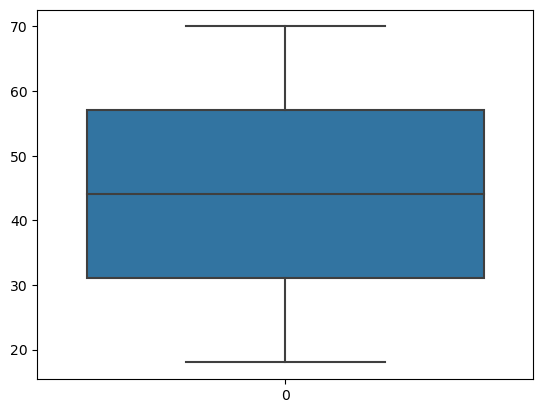

In [52]:
sns.boxplot(df['Age'])

In [53]:
# Calculate the IQR (Interquartile Range)
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)])
# Print the outliers
print("Outliers:")
print(outliers)
outliers = ((df['Age'] < lower_bound) | (df['Age'] > upper_bound))

df=df[~outliers]
print(df)

Outliers:
Empty DataFrame
Columns: [Customer ID, Age, Gender, Item Purchased, Category, Purchase Amount (USD), Location, Size, Color, Season, Review Rating, Subscription Status, Shipping Type, Discount Applied, Promo Code Used, Previous Purchases, Payment Method, Frequency of Purchases, reviews]
Index: []
      Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899       

Objective: Convert the data to a range of 0 to 1 using the formula x normalized = (x - min(x)) / (max(x) - min(x)). 
Opt for standardization when dealing with data containing outliers or deviating from a normal distribution, 
as it is less influenced by outliers. Choose normalization when there are varying scales among your data and features, 
and you aim to limit values between 0 and 1.

In [54]:
# normalising previous purchase coloumn to get Customer retention rate
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data
df['Customer Retention Rate'] = scaler.fit_transform(df[['Previous Purchases']])*100
print(df)

      Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2                        73  Massachusetts   

4. DATA VISUALIZATION

Let's employ visualization techniques to examine the influence of different factors, including seasonality, item attributes such as size and color, and promotional activities like discounts and promo codes, on customer purchasing choices.

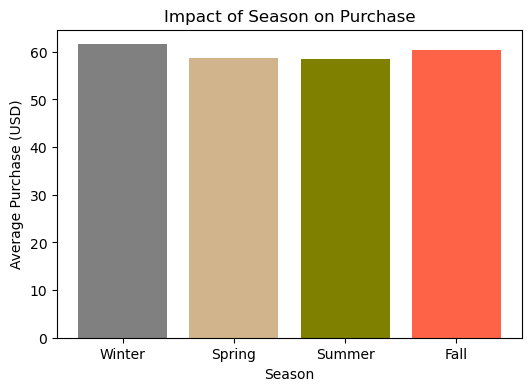

In [66]:
seasons = df['Season'].unique()
average_purchase_by_season = df.groupby('Season')['Purchase Amount (USD)'].mean()

plt.figure(figsize=(6, 4))
plt.bar(seasons, average_purchase_by_season, color=['grey', 'tan', 'olive', 'tomato'])
plt.title("Impact of Season on Purchase")
plt.xlabel("Season")
plt.ylabel("Average Purchase (USD)")
plt.show()

From the graphical representation, it's evident that customers made more purchases during the winter and autumn compared to the spring and summer periods.

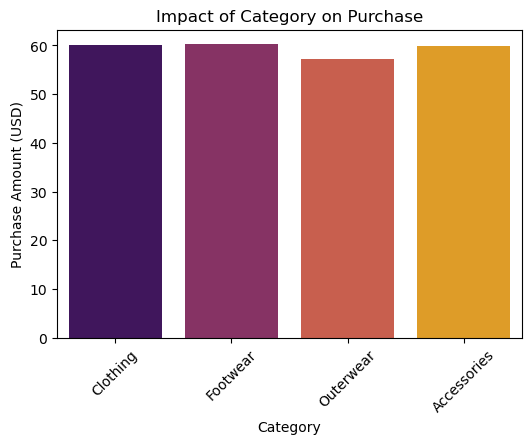

In [68]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Category', y='Purchase Amount (USD)', data=df, ci=None, palette='inferno')
plt.title("Impact of Category on Purchase")
plt.xticks(rotation=45)
plt.show()

According to the graph, the Outerwear Category appears slightly below the other categories.

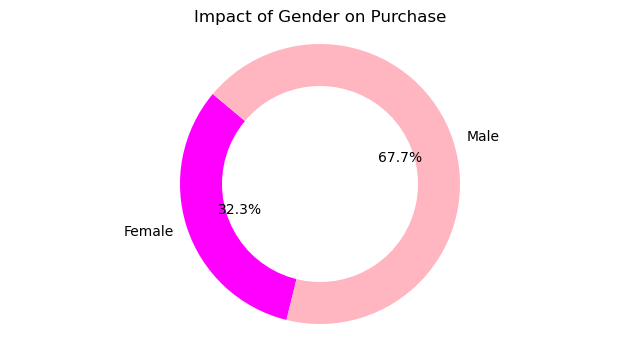

In [70]:
gender_purchase = df.groupby('Gender')['Purchase Amount (USD)'].sum()

# Create a donut chart
fig, ax = plt.subplots(figsize=(8, 4))
ax.pie(gender_purchase, labels=gender_purchase.index, autopct='%1.1f%%', startangle=140, colors=['magenta', 'lightpink'], wedgeprops=dict(width=0.4))
ax.set_title("Impact of Gender on Purchase")
plt.axis('equal')  # Equal aspect ratio ensures that the chart is drawn as a circle.

# Draw a circle in the center to create a donut chart
center_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(center_circle)

plt.show()

Males are more likely to spend (67%), whereas females are less likely to spend (32%).

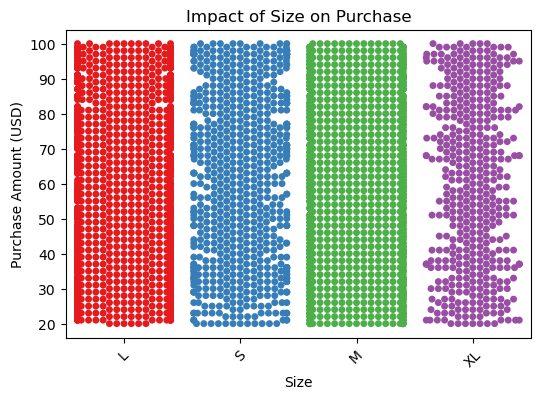

In [74]:
plt.figure(figsize=(6, 4))
sns.swarmplot(x='Size', y='Purchase Amount (USD)', data=df, palette='Set1')
plt.title("Impact of Size on Purchase")
plt.xlabel('Size')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

As shown in the chart, the XL size had less purchases than the other sizes Large, Small, and Mediam.

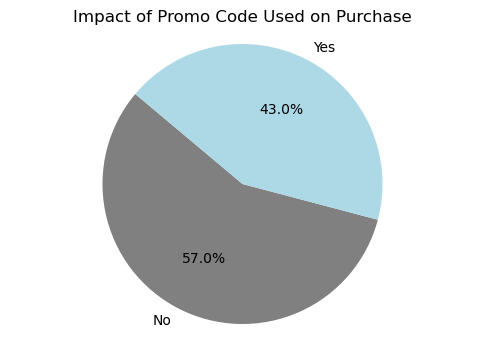

In [82]:
promo_counts = df['Promo Code Used'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 4))
plt.pie(promo_counts, labels=promo_counts.index, autopct='%1.1f%%', startangle=140, colors=['grey', 'lightblue'])
plt.title("Impact of Promo Code Used on Purchase")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

It is apparent that the use of a promo code has no discernible impact on the purchase.

Let's analyze the relationship between customer location (age and gender) and their purchase behavior.

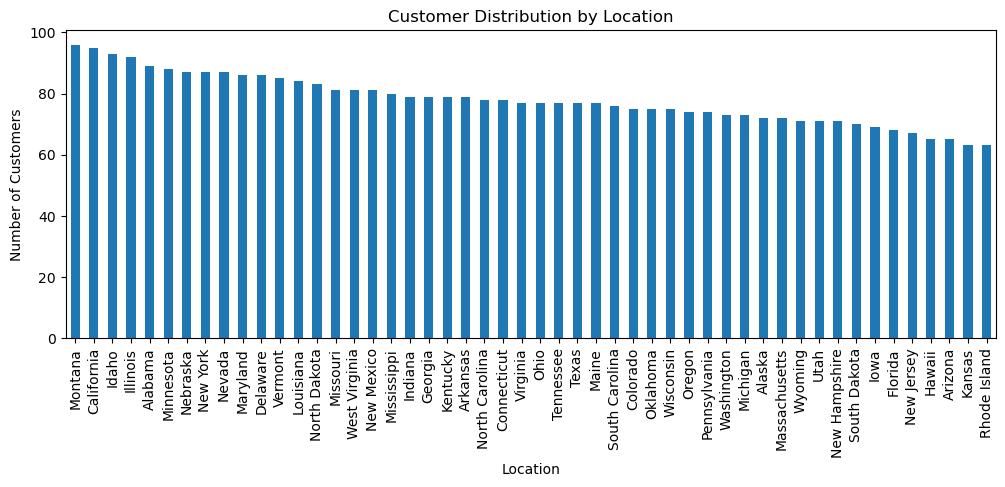

In [83]:
location_counts.plot(kind="bar", figsize=(12, 4))
plt.title("Customer Distribution by Location")
plt.xlabel("Location")
plt.ylabel("Number of Customers")
plt.show()

Montana distinguishes itself by exhibiting a noteworthy quantity of customers, surpassing all other states in this aspect. The state's flourishing business environment and dynamic consumer market have played a pivotal role in fostering its commendable customer base.

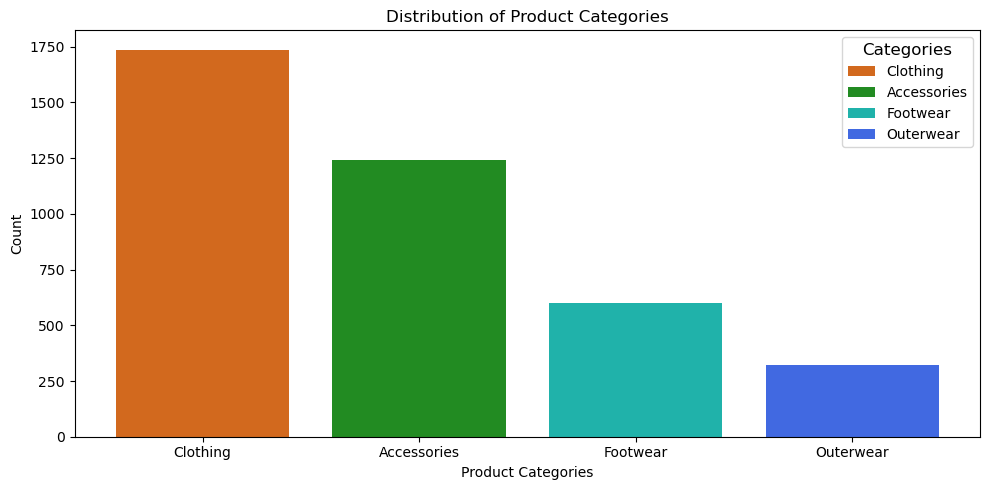

In [95]:
category_counts = df['Category'].value_counts()

# Define a list of different colors for each bar
colors = ['chocolate', 'forestgreen', 'lightseagreen', 'royalblue', 'darkviolet']

# Create a figure and axis
plt.figure(figsize=(10, 5))
ax = plt.gca()

# Plot the bar chart with different colors for each bar
bars = plt.bar(category_counts.index, category_counts.values, color=colors)

# Add labels and title
plt.xlabel('Product Categories')
plt.ylabel('Count')
plt.title('Distribution of Product Categories')
plt.xticks(rotation=0)

# Display the chart
plt.tight_layout()

# Optionally, you can add a legend to show the correspondence between colors and categories
legend_labels = category_counts.index[:len(colors)]  # Take labels for the number of colors used
legend = plt.legend(bars[:len(colors)], legend_labels, title='Categories', loc='upper right')
plt.setp(legend.get_title(), fontsize=12)

plt.show()


As evident, the clothing category enjoys significant popularity among consumers. Let's delve into identifying the highest spenders in this category among the top five statuses.

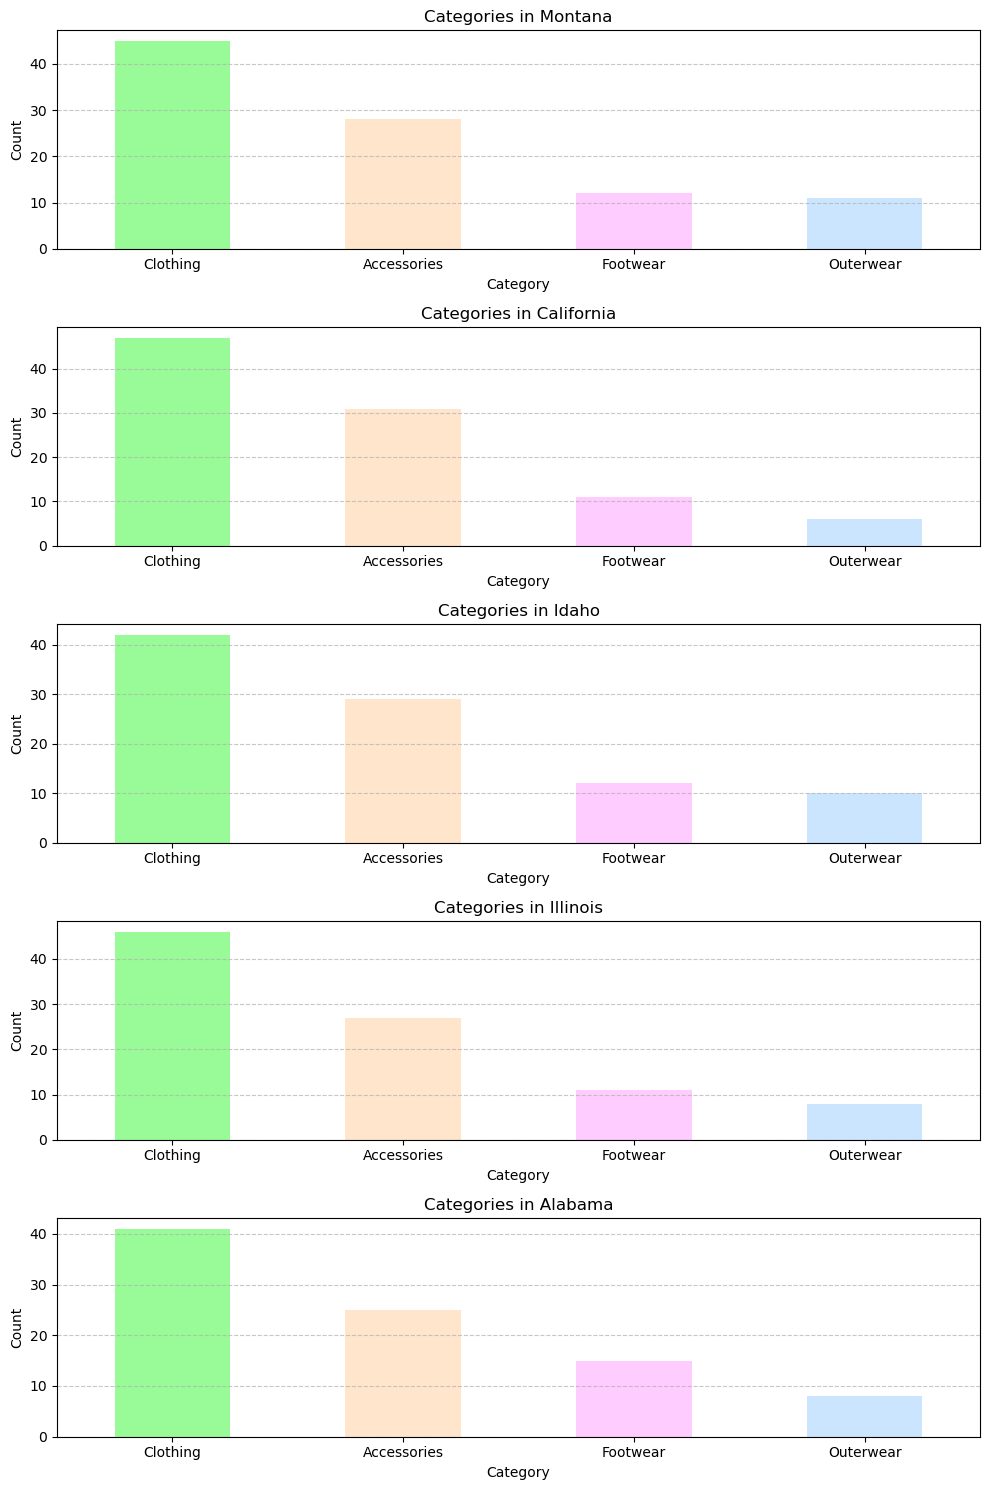

In [97]:
top_locations = df['Location'].value_counts().head(5).index

# Define different colors for bars
colors = ['#98FB98', '#FFE5CC', '#FFCCFF', '#CCE5FF', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create a subplot grid for each location
fig, axes = plt.subplots(5, 1, figsize=(10, 15))

# Iterate through the top locations and create category distribution plots with different colors
for i, location in enumerate(top_locations):
    location_data = df[df['Location'] == location]
    
     # Count the most common product categories in this location
    category_counts = location_data['Category'].value_counts().head(10)
    
    # Create a bar plot for the category distribution with different colors
    ax = axes[i]
    category_counts.plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f"Categories in {location}")
    ax.set_xlabel("Category")
    ax.set_ylabel("Count")
    ax.set_xticklabels(category_counts.index, rotation=0)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust subplot layout for a clean appearance
plt.tight_layout()

# Display the visualizations
plt.show()

As we can see, Montana, California, Idaho, Illinois, and Alabama are the top five states in terms of clothing spending.

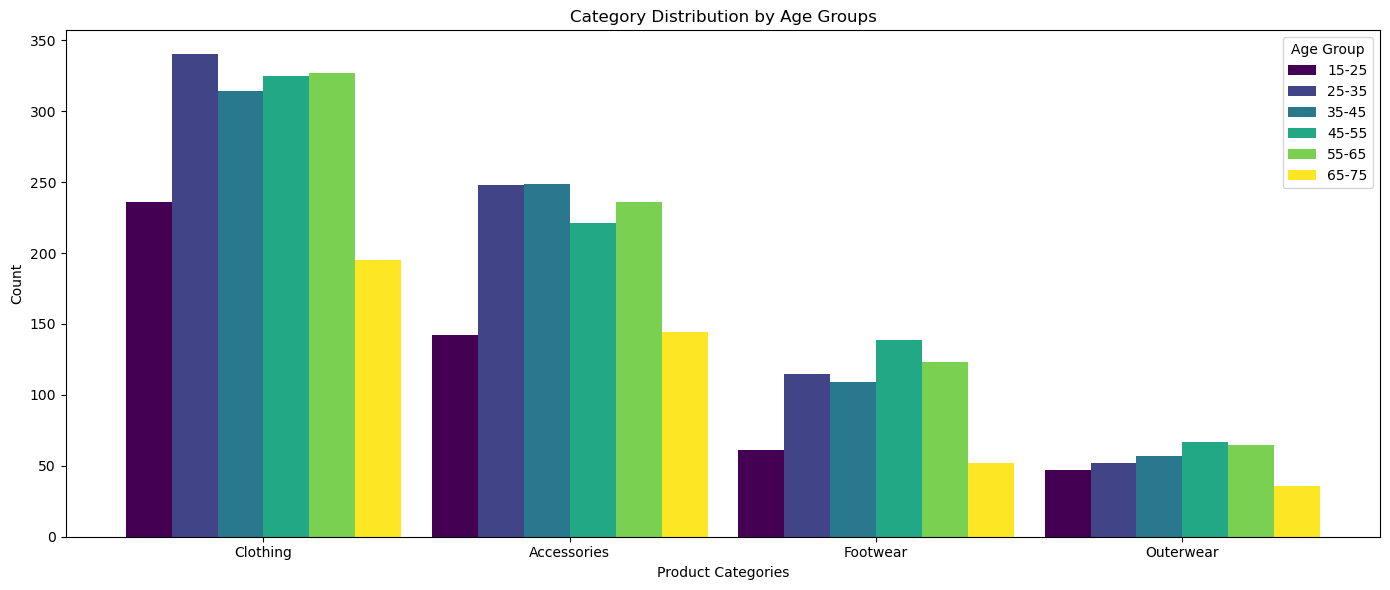

In [101]:
age_groups = [15, 25, 35, 45, 55, 65]

# Create subplots for each age group
fig, ax = plt.subplots(figsize=(14, 6))

# Create a colormap for age groups
colors = plt.cm.viridis(np.linspace(0, 1, len(age_groups)))

# Initialize a dictionary to store category counts for each age group
category_counts_by_age = {age: [] for age in age_groups}

# Calculate category counts for each age group
for age in age_groups:
    age_group_data = df[(df['Age'] >= age) & (df['Age'] < age + 10)]
    category_counts = age_group_data['Category'].value_counts()
    category_counts_by_age[age] = category_counts

# Create the bar chart
width = 0.15
x = np.arange(len(category_counts_by_age[age_groups[0]].index))

for i, age in enumerate(age_groups):
    category_counts = category_counts_by_age[age]
    ax.bar(x + i * width, category_counts, width=width, label=f'{age}-{age+10}', color=colors[i])

ax.set_xlabel('Product Categories')
ax.set_ylabel('Count')
ax.set_title('Category Distribution by Age Groups')
ax.set_xticks(x + width * (len(age_groups) - 1) / 2)
ax.set_xticklabels(category_counts_by_age[age_groups[0]].index, rotation=0)
ax.legend(title='Age Group')

plt.tight_layout()
plt.show()

Observing the data, it is evident that Clothing stands out as the most favored category across all age groups. Accessories enjoy consistent popularity in all age groups except for those between 15-25 and 65-75. Conversely, the Footwear category exhibits its peak popularity within the 45-55 age group. Finally, Outerwear demonstrates nearly uniform popularity across all age groups.

5. CONCLUSION

1. Customers tend to exhibit a higher inclination for making purchases during the winter and autumn seasons in comparison to the spring and summer periods. Within the product categories, the Outerwear category registers slightly lower purchase amounts, suggesting areas that could be targeted for improvement.

2. In terms of gender-based spending, males contribute to 67% of the total expenditure, while females account for 32% of the overall purchases. Notably, the XL size category demonstrates lower purchase volumes when contrasted with other sizes such as Large, Small, and Medium.

3. The utilization of promo codes appears to lack a substantial impact on influencing customer purchasing behavior. Montana stands out in the dataset, boasting a notable number of customers, indicative of a flourishing consumer market in the region.

4. Clothing emerges as the predominant product category, enjoying widespread popularity across all consumer demographics. Accessories, on the other hand, maintain uniform appeal across various age groups, with exceptions noted in the 15-25 and 65-75 age brackets. Furthermore, Footwear experiences heightened popularity among individuals aged 45-55, while Outerwear consistently holds favor across all age groups.

The examination of customer behavior and purchasing data has unveiled several significant insights. Elements such as seasonal fluctuations, product categories, gender, size preferences, and the utilization of promo codes collectively contribute to shaping customer purchase decisions. Additionally, the data highlights Montana as possessing a robust consumer market, with clothing emerging as the favored product category spanning various age groups. These insights serve as valuable inputs for refining marketing strategies, optimizing product offerings, and tailoring promotions to effectively target and cater to diverse customer segments.